# Performing Clustering on already extracted features

In [1]:
from itertools import cycle
from sklearn.cluster import AffinityPropagation
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D

In [16]:
DataDir = "/Volumes/VVIP/DARA_Summer_School/features.txt"

In [17]:
#Load data from text file
Data = np.loadtxt(DataDir)

In [18]:
newData = Data[:,1:9] #Extract the 8 features

In [19]:
print(newData.shape)

(80, 8)


In [32]:
#Clustering
af = AffinityPropagation(damping=0.95) ## you may want to play with the default arguments to tune the number of clusters found
 
clustering = af.fit(newData) # where data is an array of shape (nPatients, nFeatures) 
 
nClusters = len(af.cluster_centers_indices_) 

In [33]:
clustering.labels_ #See the labels of the clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1])

In [34]:
nClusters

2

In [35]:
i = 0
patientNames = np.array([])
for i in range(len(Data)):
    pid = Data[i,0]
    patientNames = np.append(patientNames, "Pat_" + str(pid))
i= i+1;

In [36]:
## This will give you the patient ID and associated label
for(im,lab) in zip(patientNames, af.labels_):
    print("{0}:  {1}".format(im, lab))
 
## this will give you the patient ID of what it thinks are exemplar images – you can then have a look and see if they make sense
print("Identified exemplar image: " + " " .join(patientNames[a] for a in af.cluster_centers_indices_))

Pat_1.0:  0
Pat_2.0:  0
Pat_3.0:  0
Pat_4.0:  0
Pat_5.0:  0
Pat_6.0:  0
Pat_7.0:  0
Pat_8.0:  0
Pat_9.0:  0
Pat_10.0:  1
Pat_11.0:  1
Pat_12.0:  0
Pat_13.0:  0
Pat_14.0:  0
Pat_15.0:  1
Pat_16.0:  0
Pat_17.0:  0
Pat_18.0:  1
Pat_19.0:  0
Pat_20.0:  0
Pat_21.0:  0
Pat_22.0:  0
Pat_23.0:  0
Pat_24.0:  0
Pat_25.0:  0
Pat_26.0:  0
Pat_27.0:  0
Pat_28.0:  0
Pat_29.0:  0
Pat_30.0:  0
Pat_31.0:  1
Pat_32.0:  0
Pat_33.0:  0
Pat_34.0:  0
Pat_35.0:  0
Pat_36.0:  0
Pat_37.0:  0
Pat_38.0:  0
Pat_39.0:  0
Pat_40.0:  0
Pat_41.0:  0
Pat_42.0:  0
Pat_43.0:  0
Pat_44.0:  0
Pat_45.0:  0
Pat_46.0:  0
Pat_47.0:  1
Pat_48.0:  0
Pat_49.0:  1
Pat_50.0:  0
Pat_51.0:  0
Pat_52.0:  1
Pat_53.0:  0
Pat_54.0:  0
Pat_55.0:  1
Pat_57.0:  0
Pat_58.0:  0
Pat_59.0:  0
Pat_60.0:  0
Pat_61.0:  1
Pat_62.0:  1
Pat_63.0:  1
Pat_64.0:  1
Pat_65.0:  0
Pat_66.0:  0
Pat_67.0:  0
Pat_68.0:  0
Pat_69.0:  1
Pat_70.0:  0
Pat_71.0:  0
Pat_72.0:  0
Pat_73.0:  1
Pat_74.0:  0
Pat_75.0:  0
Pat_76.0:  0
Pat_77.0:  0
Pat_78.0:  0
Pat_79.0

<IPython.core.display.Javascript object>


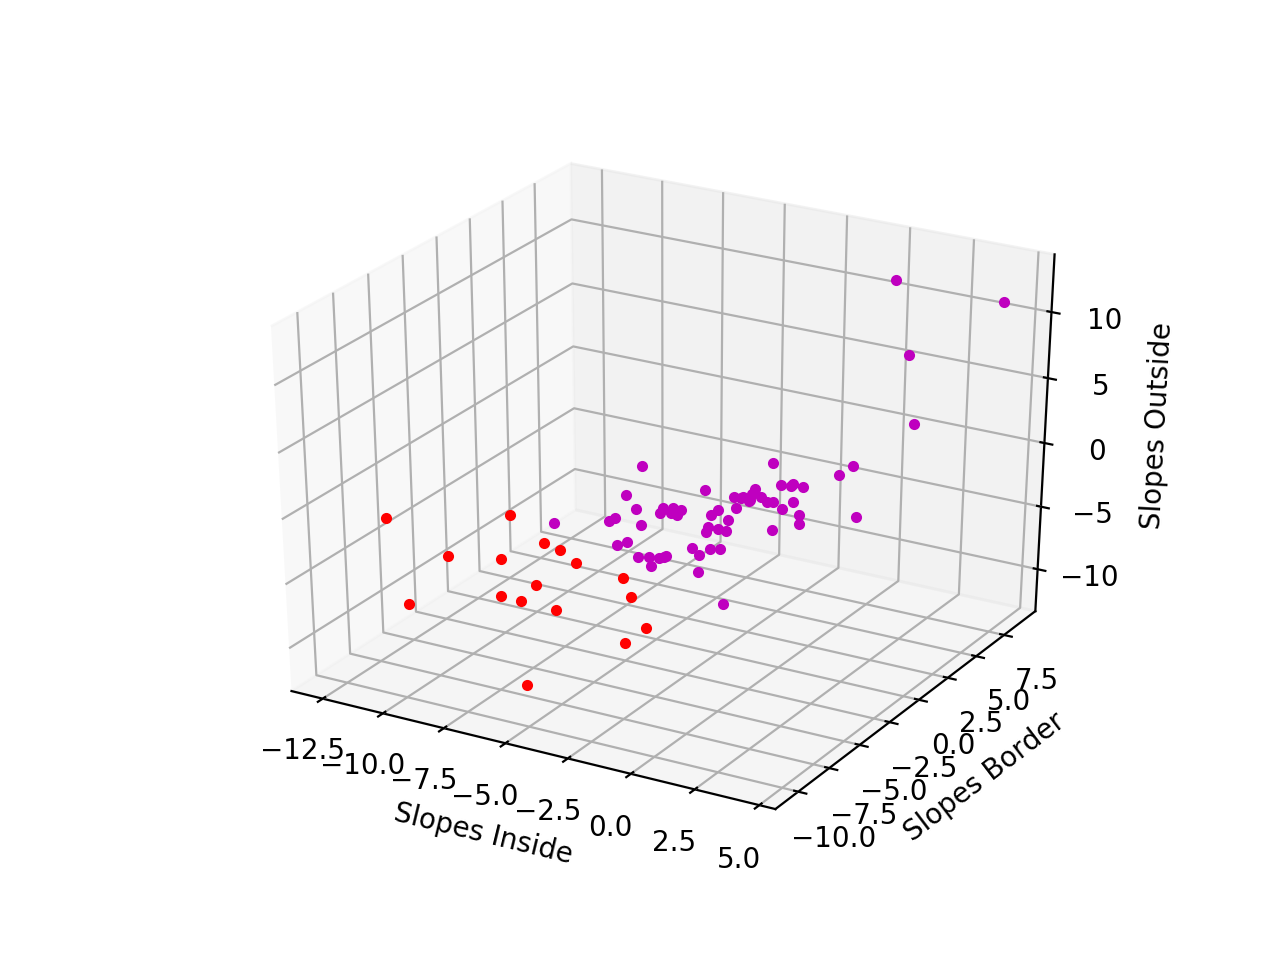

m 0
r 1


In [37]:
#Let's visualise the clusters
%matplotlib notebook

fig = plt.figure(1)
ax1  = fig.add_subplot(111, projection='3d')
 
## This -should- allow you to plot any number of clusters in different colours
#colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
colors = cycle({'b', 'g', 'r', 'c', 'm', 'y', 'k'})
for k, col in zip(range(nClusters), colors):
    class_members = af.labels_ == k
    print(col, k)
 
    ax1.plot(Data[class_members, 9], Data[class_members, 10] , Data[class_members, 11], col + '.', label=nClusters) ## this will plot clusters for the features four and 5
    
    ax1.set_xlabel('Slopes Inside') #InsideBorderAndOutside
    ax1.set_ylabel('Slopes Border')
    ax1.set_zlabel('Slopes Outside')
plt.show()

# Let's work on the images

In [2]:
import matplotlib.pyplot as plt
import os
import re
import nibabel as nib
import fnmatch
from matplotlib import colors
from matplotlib import cm
from ipywidgets import interact, fixed, interactive
from IPython.display import clear_output

In [3]:
def show_slices(slices, masks, gradients):
    fig, axes = plt.subplots(3, len(slices), sharey=True, sharex=True)
    for i, s in enumerate(slices):
        axes[0][i].imshow(s, cmap="gray", origin="lower")

    for i, s in enumerate(masks):
        axes[1][i].imshow(s, cmap="gray", origin="lower")

    for i, s in enumerate(gradients):
        axes[2][i].imshow(s, cmap=plt.cm.jet, origin="lower")

In [4]:
numbers = re.compile(r'(\d+)')
def numericalSort(value):
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts

In [5]:
def getAllCBCTs(path):
    files = []
    for i in os.listdir(path):
        if os.path.isfile(os.path.join(path,i)) and 'CBCT_' in i:
            files.append(i)
    return files

In [6]:
def findImages(path):
    result = []
    for file in os.listdir(path):
        if fnmatch.fnmatch(file,"[CBCT_]*.nii"):
            result.append(file)

    return result

In [7]:
def loadImage(path):
    image = nib.load(path)
    return image.get_fdata()

def loadImages(path):
    if not os.path.exists(path):
        print(f'Cannot find folder "{os.path.abspath(path)}".\nDoes the folder exist and contain patient data?')
        sys.exit()

    filelist = findImages(path)
    imagepaths = list(map(lambda filename: os.path.join(path, filename), filelist))
    sortedimagepaths = sorted(imagepaths, key=numericalSort)
    #print(sortedimagepaths)
    return list(map(lambda path: loadImage(path), sortedimagepaths))

def loadMask(path):
    maskPath = os.path.join(path, "mask.nii")
    maskImage = nib.load(maskPath)
    return maskImage.get_fdata()

In [8]:
def compute_regressions(images, degree):
    num_images = len(images)
    A = np.stack(images)
    A2 = A.reshape(num_images, -1)
    X = np.arange(num_images)
    regressions = np.polyfit(X, A2, degree)
    newShape = images[0].shape + (degree+1,)
    return regressions.reshape(newShape)

def compute_gradients(images):
    num_images = len(images)
    A = np.stack(images)
    A2 = A.reshape(num_images, -1)
    [dx,dy] = np.gradient(A2)
    return dx.reshape(A.shape)

def apply_mask(image, mask, threshold):
    masked = np.ma.MaskedArray(image, mask < threshold)
    return masked

In [9]:
def shower():
    plt.show()

def plotter(data, masks, gradients):
    
    fig, axes = plt.subplots(3, len(data), sharey=True, sharex=True)
    plt.rcParams["figure.figsize"] = [30,15]
    #fig.subplots_adjust(hspace=0.8, wspace=0.8)
    
    # plot the data slices
    data_stack = np.stack(data)
    data_min = np.amin(data_stack)
    data_max = np.amax(data_stack)
    data_bounds = [data_min, data_max]
    data_norm = colors.Normalize(vmin=data_min, vmax=data_max)
    data_colormap = "gray"

    #fig.colorbar(cm.ScalarMappable(cmap=data_colormap, norm=data_norm), ax=axes[0], use_gridspec=True)

    for i, s in enumerate(data):
        axes[0][i].imshow(s, cmap=data_colormap, origin="lower")


    # plot the mask slices
    mask_colormap = data_colormap
    mask_norm = data_norm

    #fig.colorbar(cm.ScalarMappable(cmap=mask_colormap, norm=mask_norm), ax=axes[1], use_gridspec=True)

    for i, s in enumerate(masks):
        axes[1][i].imshow(s, cmap=mask_colormap, origin="lower")


    # plot the gradient slices
    gradient_stack = np.stack(gradients)
    gradient_min = np.amin(gradient_stack)
    gradient_max = np.amax(gradient_stack)
    gradient_bounds = [gradient_min, 0, gradient_max]
    gradient_colormap = colors.ListedColormap(['green', 'red'])
    gradient_norm = colors.BoundaryNorm(gradient_bounds, gradient_colormap.N)

    #fig.colorbar(cm.ScalarMappable(cmap=gradient_colormap, norm=gradient_norm), ax=axes[2], use_gridspec=True)

    for i, s in enumerate(gradients):
        img = axes[2][i].imshow(s, cmap=gradient_colormap, norm=gradient_norm, origin="lower")

In [10]:
def display_images(fixed_image_z, fixed_npa):
    # Create a figure with two subplots and the specified size.
    #plt.subplots(1,1,figsize=(10,8))
    fig, ax = plt.subplots()
    
    # Draw the fixed image in the first subplot.
    plt.subplot(1,1,1)
    ax = plt.imshow(fixed_npa[fixed_image_z,:,:], cmap=plt.cm.gray);
    plt.title(str(scan) + ' scan' )
    #plt.colorbar();
    
    return fig, ax

In [11]:
dataDir = "/Volumes/VVIP/DARA_Summer_School/Cases/" #"/Users/amugongolameck/PhD/Data/ScansFromPacks/"

In [12]:
patientList =  os.listdir(dataDir)

In [13]:
print(patientList)

['Case_01', 'Case_02', 'Case_03', 'Case_04', 'Case_05', 'Case_06', 'Case_07', 'Case_08']


Case_01
53


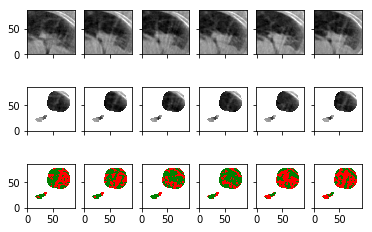

Case_02
60


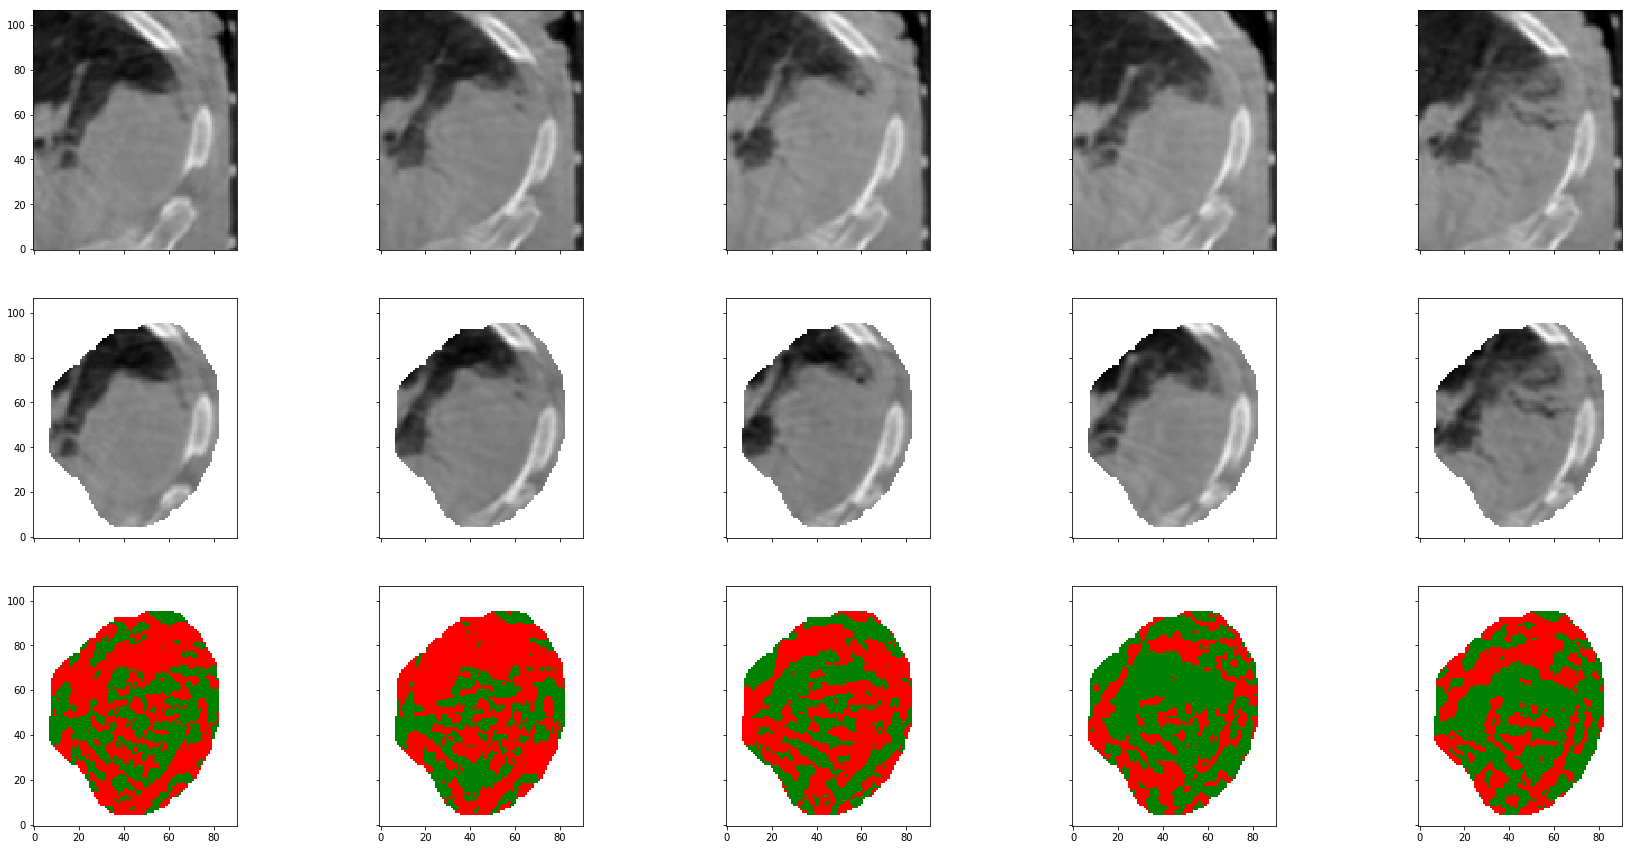

Case_03
56


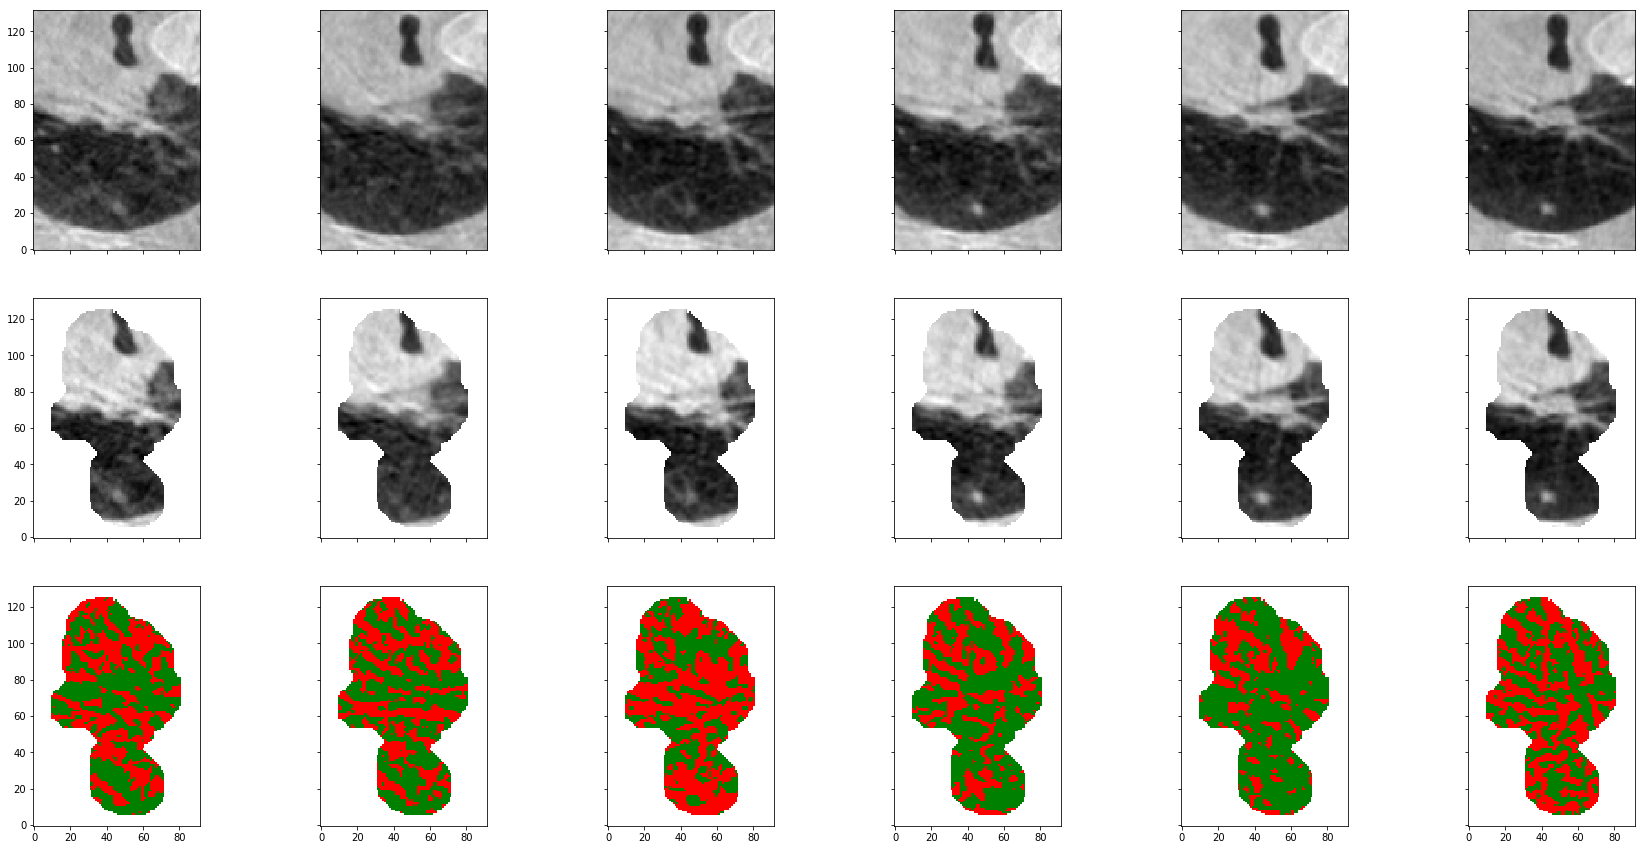

Case_04
42


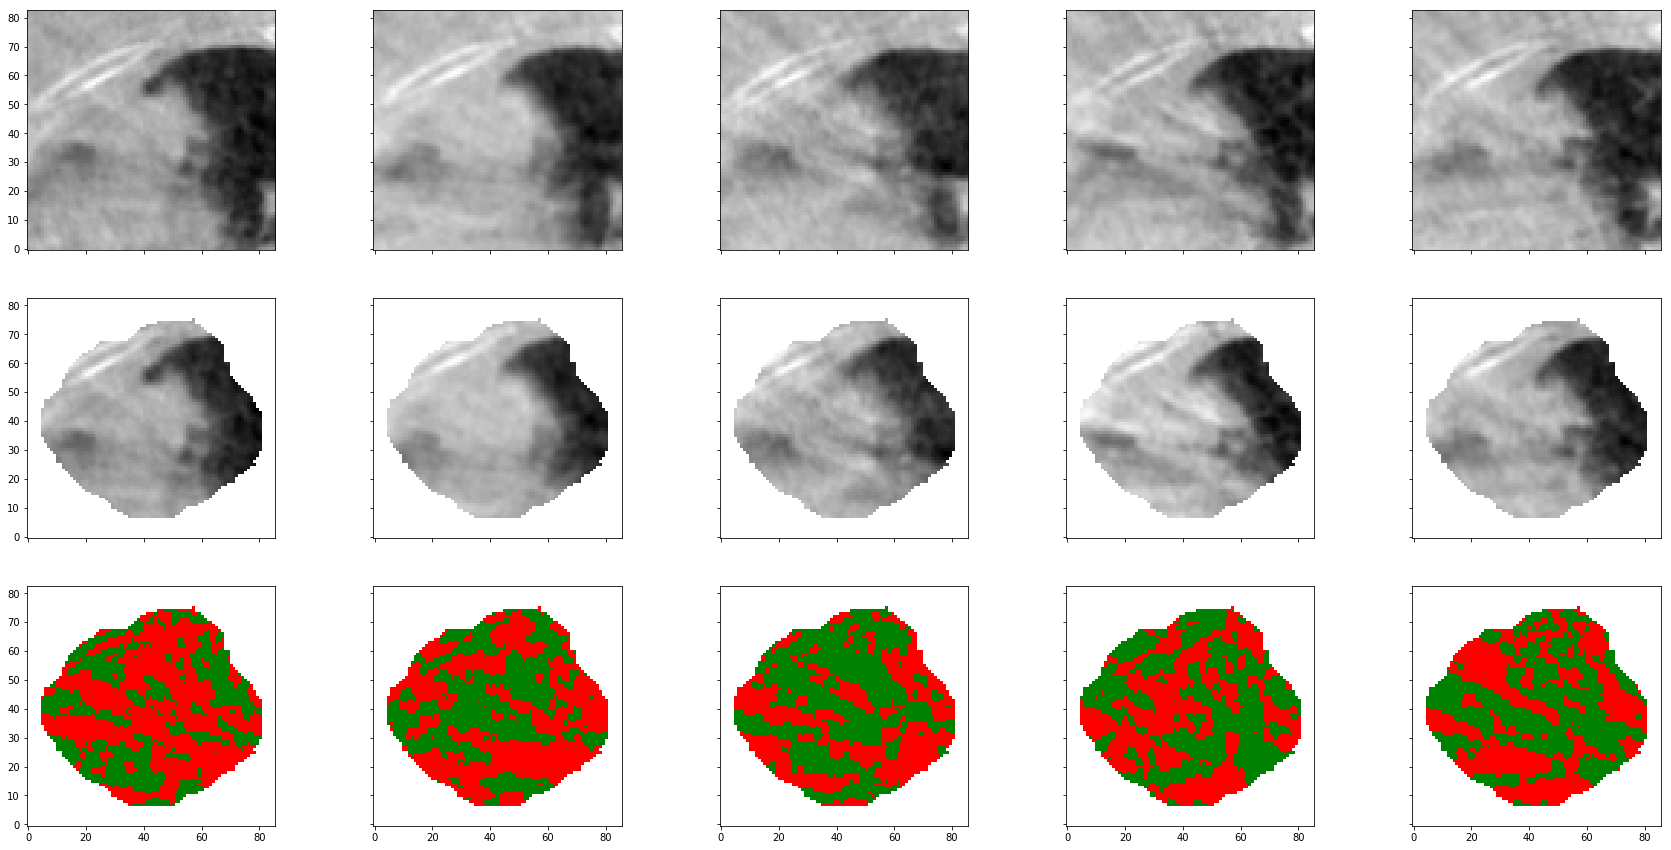

Case_05
103


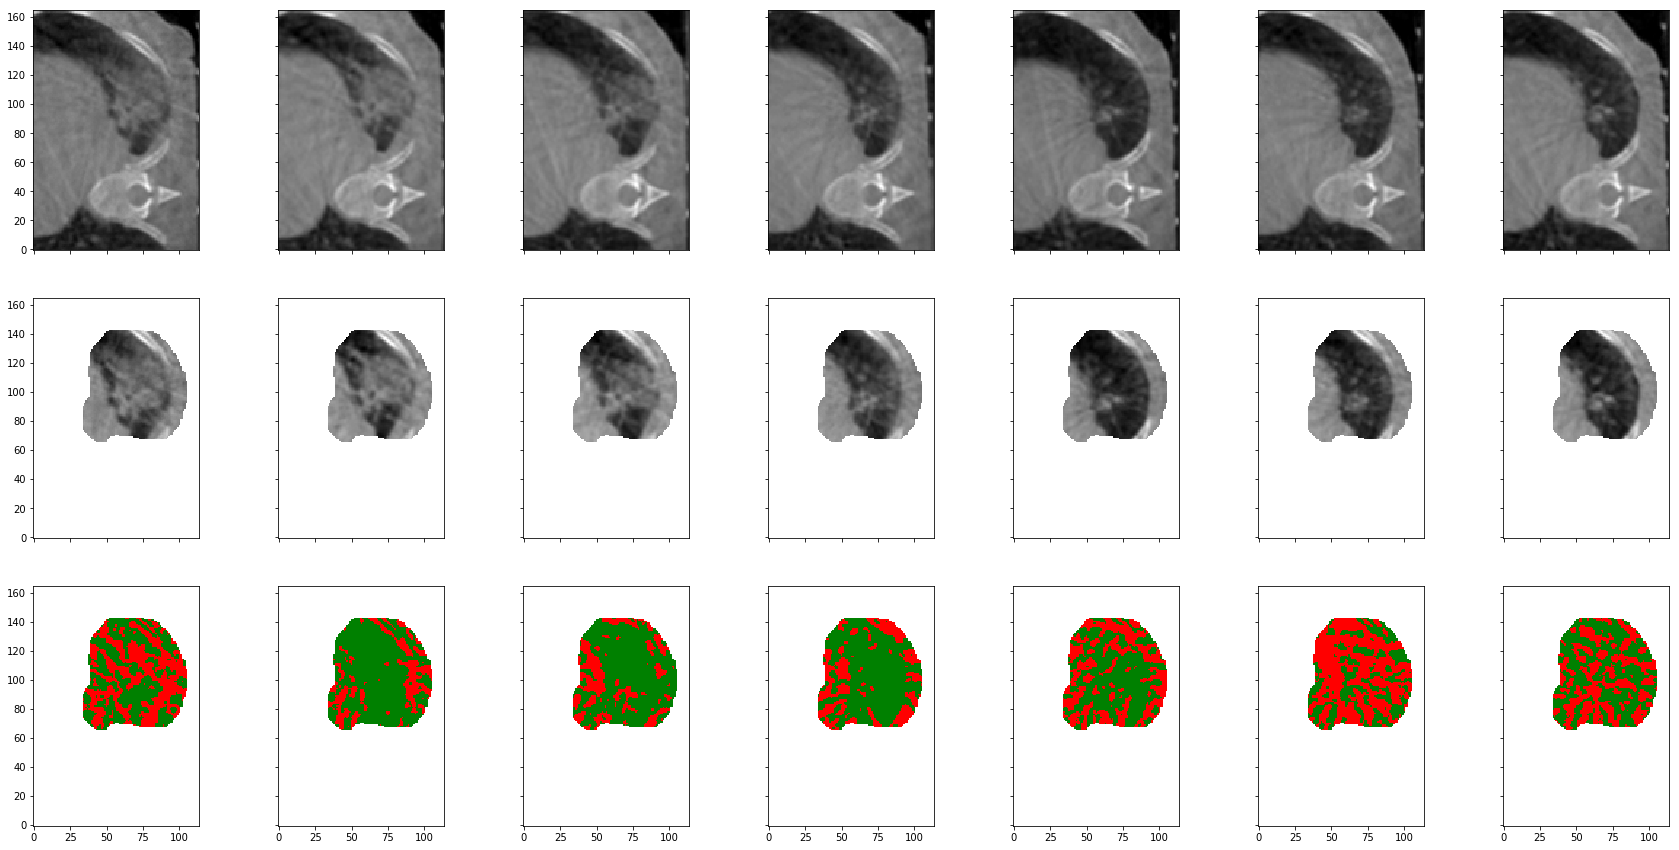

Case_06
41


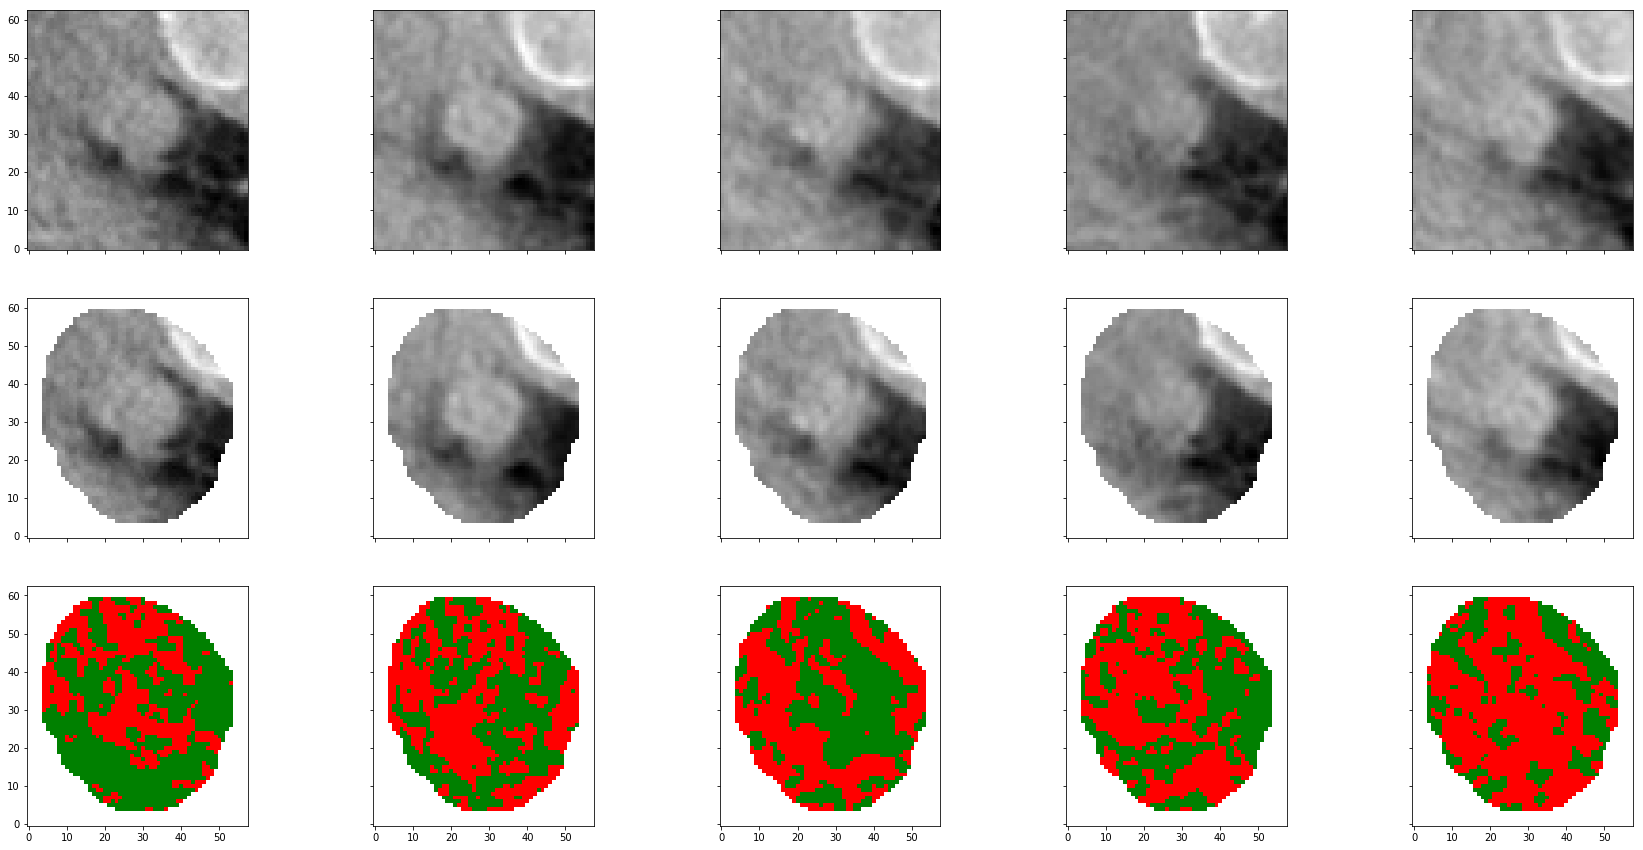

Case_07
32


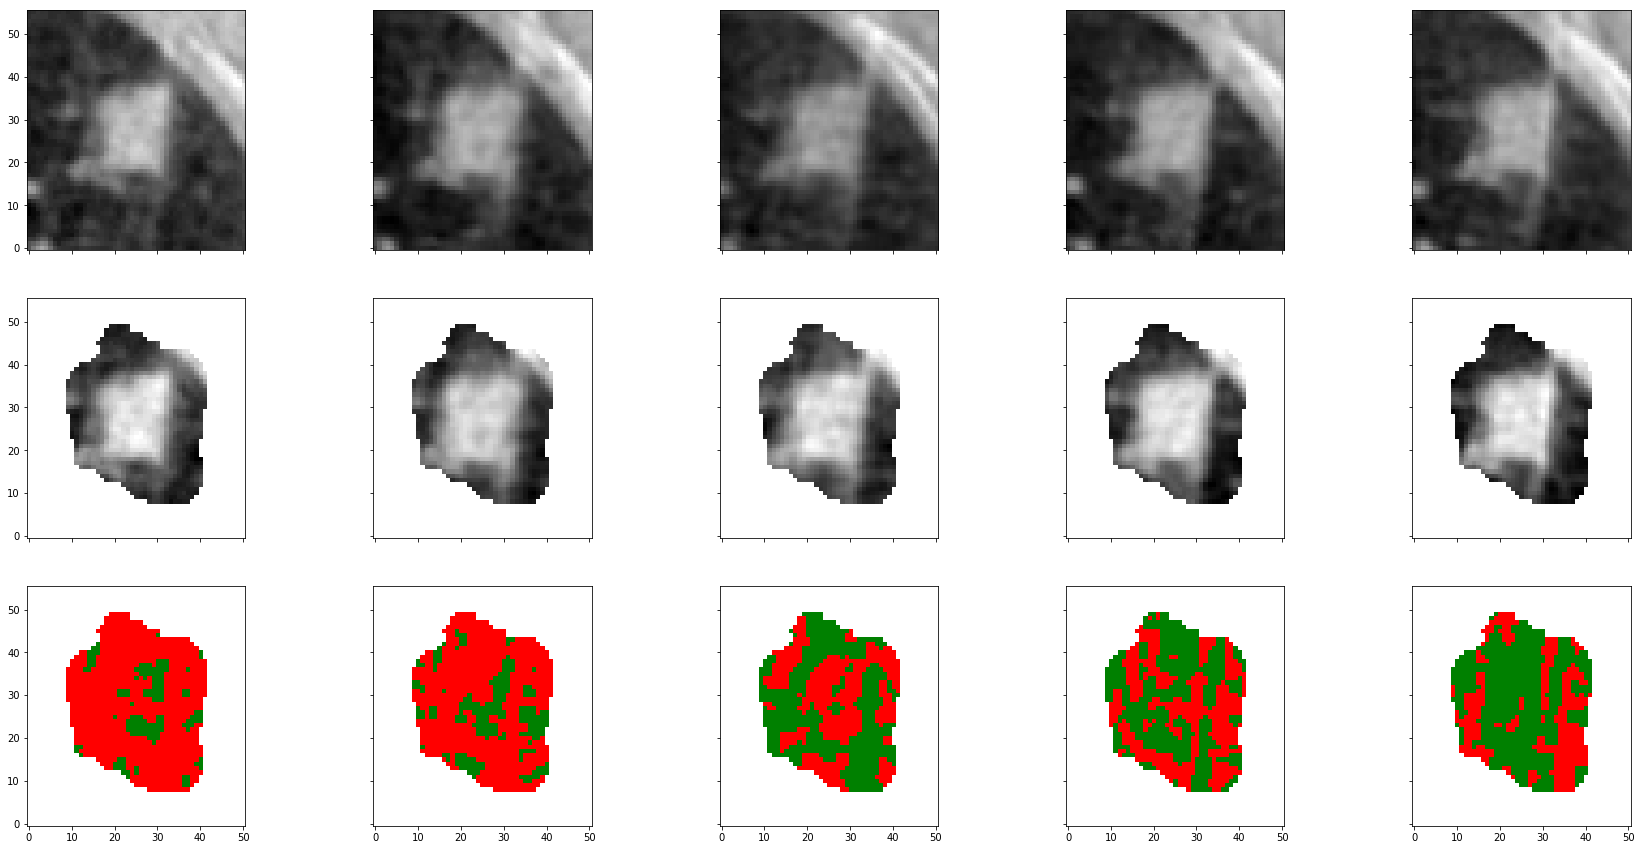

Case_08
28


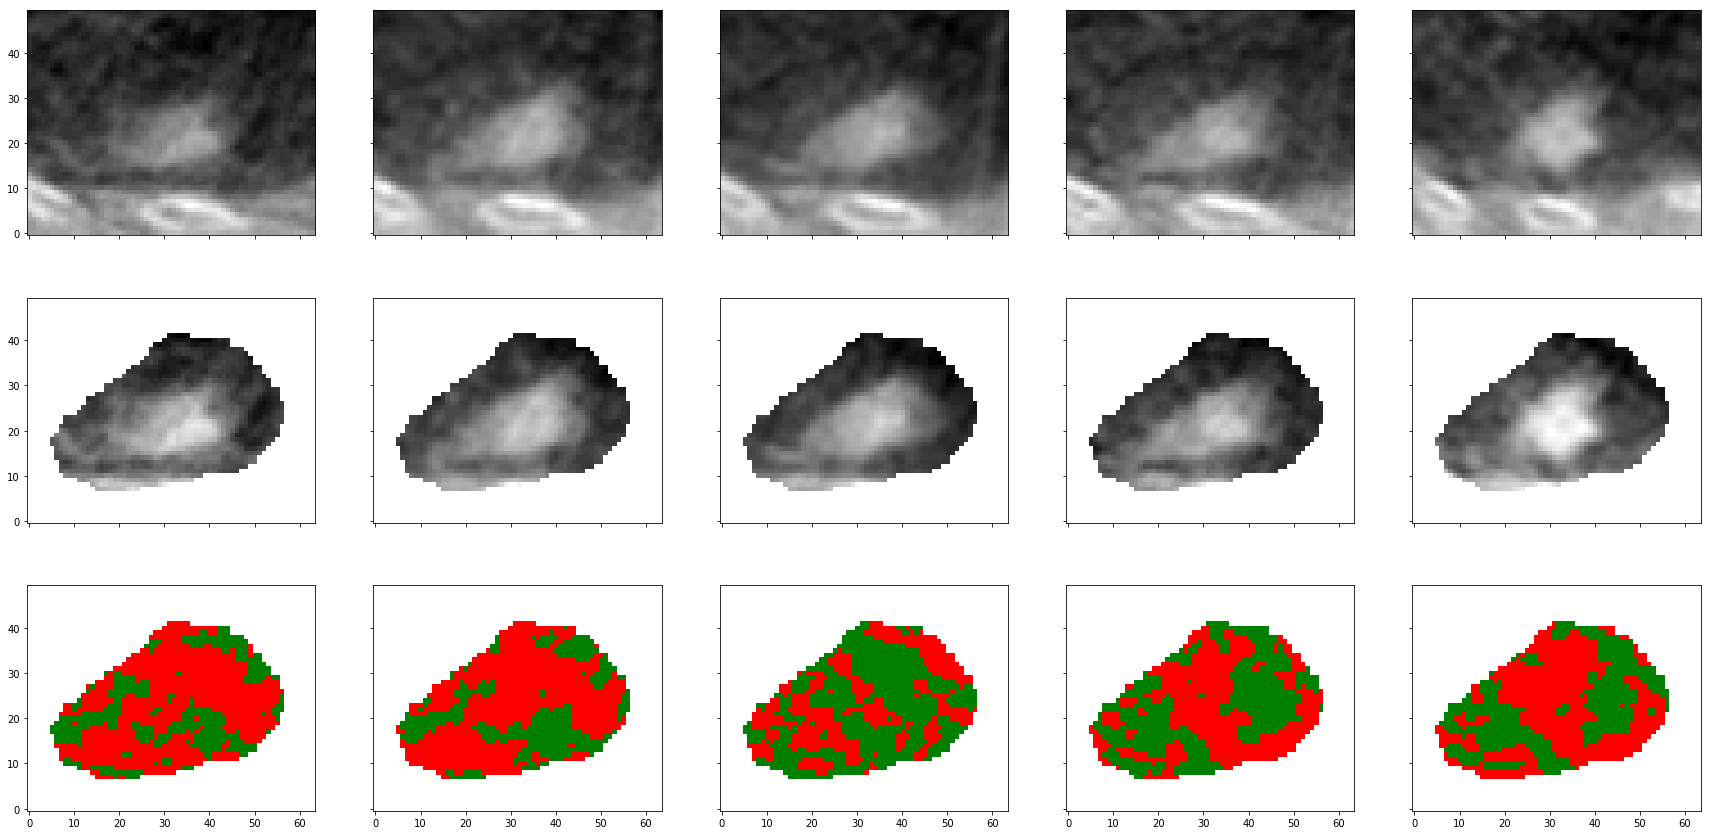

In [13]:
#Display the images per patient
for p in patientList:
    
    print(p)
    pPath = os.path.join(dataDir, p)
    data = loadImages(pPath)
    mask = loadMask(pPath)
    
    size = mask.shape
    
    threshold = 95.0
    masked = list(map(lambda i: apply_mask(i, mask, threshold), data))
    grads = compute_gradients(masked)
    masked_grads = list(map(lambda i: apply_mask(i, mask, threshold), grads))
    
    slicehere = round(size[2] / 2)
    print(slicehere)
    data_slices = list(map(lambda image: image[:,:,slicehere], data))
    masked_slices = list(map(lambda image: image[:,:,slicehere], masked))
    gradient_slices = list(map(lambda image: image[:,:,slicehere], masked_grads))
    
    plotter(data_slices, masked_slices, gradient_slices)
    shower()
    
    #You can also the use the display_images helper function

In [17]:
for p in patientList:
    
    scanPath = os.path.join(dataDir, p)
    scans = getAllCBCTs(scanPath)
    
    #Lets get the mask
    maskPath = os.path.join(scanPath + "/mask.nii")
    maskIm = nib.load(maskPath)
    maskData = maskIm.get_fdata()
    size = maskIm.get_shape()
    
    numScans = len(scans) #Number of scans for each patient
    images = np.zeros((numScans,size[0], size[1], size[2]))
    count = 0
    
    #Sort scans
    sortedScans = sorted(scans, key=numericalSort)
    
    #Go through all scans of the patient
    for scan in sortedScans:
        
        imPath = os.path.join(scanPath + "/" + scan)
        #im =  sitk.ReadImage(imPath, sitk.sitkFloat32)
        im = nib.load(imPath)
        imData = im.get_fdata()
        images[count,:,:,:] = imData #sitk.GetArrayFromImage(im)
        count = count + 1
    
    tyd = range(0,numScans)
    
    #Stack up images in of each patient and go through the Z slice to extract (intensities) features in every voxel
    for z in range(0, maskData.shape[2]):
        for x in range(0, maskData.shape[1]):
            for y in range(maskData.shape[0]):
                #Check  the area
                if maskData[y][x][z] >= 50:
                    
                    #pxVal are you features
                    pxVal = np.squeeze(images[:,y,x,z])-1024 #minus 1024 to convert Hounsefield units
                    
                    #Since you working with longitudinal images, might like would fit the data 
    break                
    #Think of how to reduce the features for each patient that you extract the same number of features per patient
    
#Reshape you array

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: get_shape method is deprecated.
Please use the ``img.shape`` property instead.

* deprecated from version: 1.2
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 3.0
  # Remove the CWD from sys.path while we load stuff.


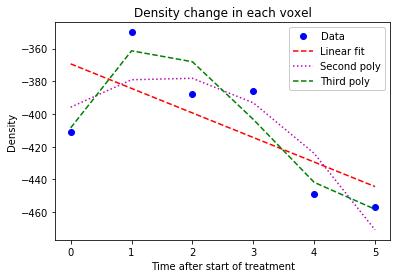

In [18]:
plt.plot(tyd, pxVal, 'bo', label='Data') 
plt.title("Density change in each voxel") 
plt.xlabel("Time after start of treatment") 
plt.ylabel("Density")

p1 = np.polyfit(tyd, pxVal, 1)
y_fit = np.polyval(p1,tyd)
plt.plot(tyd, y_fit, '--r', label='Linear fit') 

#Second degree
p2 = np.polyfit(tyd, pxVal, 2)
y_fit2 = np.polyval(p2,tyd)
plt.plot(tyd,y_fit2 , 'm:',  label='Second poly') 
#p = np.poly1d(z)

#Third degree
p3 = np.polyfit(tyd, pxVal, 3)
y_fit3 = np.polyval(p3,tyd)
plt.plot(tyd, y_fit3, '--g', label='Third poly')
plt.legend(framealpha=1, frameon=True);

In [ ]:
#Cluster the features for all patients

#Examine the cluster

#